[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/Machine_Learning_3rd_edition/blob/master/Volume_II_Python/Part-2-ML_sklearn/5-01-Regression_housing.ipynb)

# Linear Regression
## Boston Housing data

R data sets can be found at [this link](http://vincentarelbundock.github.io/Rdatasets/datasets.html).


### Code Accompanying ***The Machine Learning Handbooks***, Volume II, Chapter 5

#### Book pdf is available on the GitHub repo: <https://github.com/kjmazidi/Machine_Learning_3rd_edition>

###### (c) 2025 KJG Mazidi, all rights reserved

In [1]:
# imports used in this notebook

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
### load the data

df = pd.read_csv('data/Boston.csv')
print(df.head())
print('\nDimensions of data frame:', df.shape)


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dimensions of data frame: (506, 14)


In [4]:
print('\nDescribe rm and medv:\n', df.loc[:, ['rm', 'medv']].describe())


Describe rm and medv:
                rm        medv
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


<Axes: xlabel='rm'>

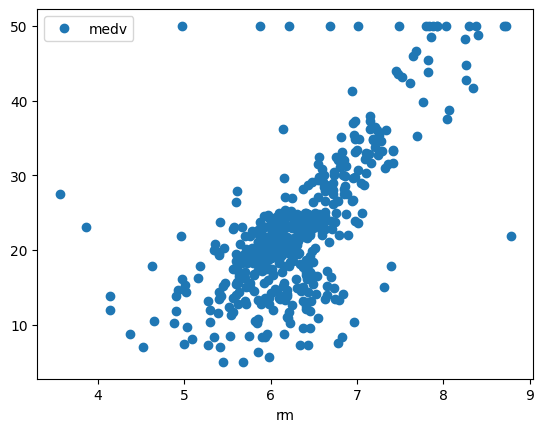

In [5]:
# plot correlation between rm and medv

df.plot(x='rm', y='medv', style='o')

What's going on with all the medv at the top of the graph?

By sorting and printing the top 25 medv rows, we see that the cut-off seems to be 50 for medv, meaning that medv for those areas is 50 or above. This was not a great choice by the original data collectors. 

In [19]:
df.sort_values(by='medv', ascending = False).head(n=25)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1,0.6310,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1,0.6680,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0


In [6]:
print(df.corr())

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

In [7]:
# train test split


X = df.iloc[:, 5].to_frame()
y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (404, 1)
test size: (102, 1)


In [8]:
# train the algorithm


linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [9]:
# retrieve coefficients
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: -30.322473656188937
coefficients: [8.39945061]


In [10]:
# make predictions

y_pred = linreg.predict(X_test)

In [11]:
# evaluation

print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 34.799741823171786
correlation= 0.6609825809998007


<Axes: xlabel='medv'>

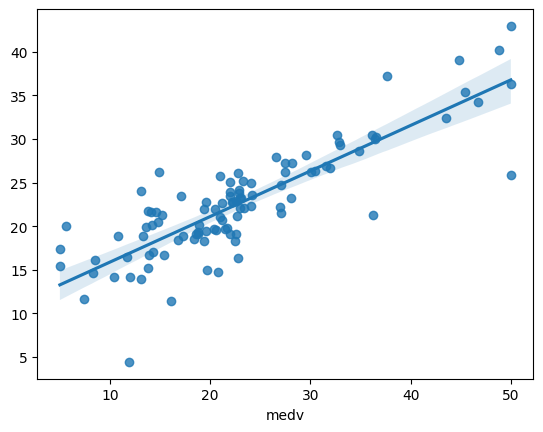

In [12]:
# plot correlation between test and actual values

sb.regplot(x=y_test, y=y_pred)

In [13]:
# train test split


X = df.iloc[:, 0:12]
y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (404, 12)
test size: (102, 12)


In [14]:
# train the algorithm


linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
# retrieve coefficients
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: 30.62432985388704
coefficients: [-1.36882736e-01  5.01195076e-02 -5.31993757e-03  3.05159600e+00
 -2.42314897e+01  5.26728460e+00 -5.36462287e-02 -1.92623793e+00
  3.12273136e-01 -1.34360741e-02 -1.08579685e+00  1.51861732e-02]


In [16]:
# make predictions

y_pred = linreg.predict(X_test)

In [17]:
# evaluation

print('mse=', mean_squared_error(y_test, y_pred))
print('correlation=', r2_score(y_test, y_pred))

mse= 27.44217673025572
correlation= 0.7326596279331052


<Axes: xlabel='medv'>

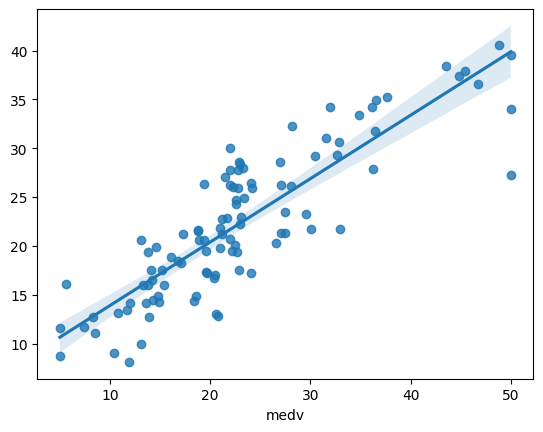

In [18]:
# plot correlation between test and actual values

sb.regplot(x=y_test, y=y_pred)